In [1]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def deriv_sigmoid(x):
    m = sigmoid(x)
    return m * (1 - m)

def mse_loss(y_exp, y_pre):
    return ((y_exp - y_pre) ** 2).mean()

class OurNetworks:
    def __init__(self):
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, y_exp):
        learn_rate = 0.1
        epochs = 1000
        for epoch in range(epochs):
            for x, y_e in zip(data, y_exp):
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b1  # Fix here: Changed 'b1' to 'b2'
                h2 = sigmoid(sum_h2)
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1
                d_L_d_ypred = -2 * (y_e - y_pred)
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)
                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            if epoch % 10 == 0:
                y_pred = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(y_exp, y_pred)
                print("Epoch {} loss {}".format(epoch, loss))

data = np.array([
    [-2, -1],
    [25, 6],
    [17, 4],
    [-15, -6]
])

output = np.array([
    1,
    0,
    0,
    1
])

network = OurNetworks()
network.train(data, output)

newinput1 = np.array([-7, -3])
newinput2 = np.array([20, 2])
print("newinput1 {}".format(network.feedforward(newinput1)))
print("newinput2 {}".format(network.feedforward(newinput2)))


Epoch 0 loss 0.33952425163222016
Epoch 10 loss 0.2907814357556586
Epoch 20 loss 0.2366742113019494
Epoch 30 loss 0.1857261202406417
Epoch 40 loss 0.14442296969448776
Epoch 50 loss 0.1136362971955152
Epoch 60 loss 0.09119030745652965
Epoch 70 loss 0.07472372494751532
Epoch 80 loss 0.062439702872469735
Epoch 90 loss 0.053091794955524706
Epoch 100 loss 0.04583487767937321
Epoch 110 loss 0.04009450905006572
Epoch 120 loss 0.03547521956271221
Epoch 130 loss 0.03170014098779245
Epoch 140 loss 0.02857192141531413
Epoch 150 loss 0.02594735881662322
Epoch 160 loss 0.023720757269380915
Epoch 170 loss 0.0218128454939938
Epoch 180 loss 0.020163279526270443
Epoch 190 loss 0.01872548704002622
Epoch 200 loss 0.017463065026829757
Epoch 210 loss 0.01634722406879005
Epoch 220 loss 0.015354948662855873
Epoch 230 loss 0.014467654762410024
Epoch 240 loss 0.01367019750282925
Epoch 250 loss 0.012950128892521468
Epoch 260 loss 0.01229713621184403
Epoch 270 loss 0.011702612624557926
Epoch 280 loss 0.0111593256

# 3.2
#MLP for the two circles problem

In [2]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Generate 2d dataset

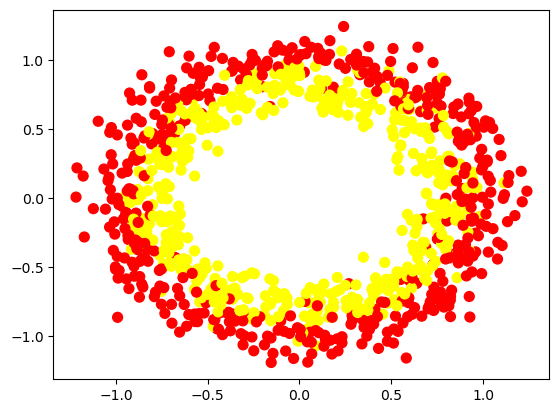

In [3]:
x,y=make_circles(n_samples=1000,noise=0.1,random_state=1)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

# Split the data for train & test

In [4]:
n_train=500
trainX,testX=x[:n_train,:],x[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

# Define the Model

In [5]:
model=Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))
#optimizer
optm=SGD(learning_rate=0.01,momentum=0.9)
#compiler
model.compile(loss='binary_crossentropy',optimizer=optm,metrics=['accuracy'])


In [6]:
#Run the NN
history=model.fit(trainX,trainy,validation_data=(testX,testy),epochs=100,verbose=2)

Epoch 1/100
16/16 - 2s - loss: 0.7484 - accuracy: 0.4680 - val_loss: 0.7175 - val_accuracy: 0.4840 - 2s/epoch - 101ms/step
Epoch 2/100
16/16 - 0s - loss: 0.6993 - accuracy: 0.5220 - val_loss: 0.7101 - val_accuracy: 0.4760 - 150ms/epoch - 9ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6888 - accuracy: 0.5220 - val_loss: 0.6992 - val_accuracy: 0.4880 - 109ms/epoch - 7ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6821 - accuracy: 0.5460 - val_loss: 0.6907 - val_accuracy: 0.4960 - 120ms/epoch - 7ms/step
Epoch 5/100
16/16 - 0s - loss: 0.6744 - accuracy: 0.5720 - val_loss: 0.6812 - val_accuracy: 0.5420 - 151ms/epoch - 9ms/step
Epoch 6/100
16/16 - 0s - loss: 0.6701 - accuracy: 0.5540 - val_loss: 0.6807 - val_accuracy: 0.5160 - 146ms/epoch - 9ms/step
Epoch 7/100
16/16 - 0s - loss: 0.6629 - accuracy: 0.5700 - val_loss: 0.6720 - val_accuracy: 0.5660 - 135ms/epoch - 8ms/step
Epoch 8/100
16/16 - 0s - loss: 0.6603 - accuracy: 0.6180 - val_loss: 0.6664 - val_accuracy: 0.5580 - 153ms/epoch - 10ms/step
Epoch 9/

Epoch 67/100
16/16 - 0s - loss: 0.4473 - accuracy: 0.8120 - val_loss: 0.4341 - val_accuracy: 0.8460 - 100ms/epoch - 6ms/step
Epoch 68/100
16/16 - 0s - loss: 0.4397 - accuracy: 0.8280 - val_loss: 0.4310 - val_accuracy: 0.8280 - 89ms/epoch - 6ms/step
Epoch 69/100
16/16 - 0s - loss: 0.4376 - accuracy: 0.8220 - val_loss: 0.4311 - val_accuracy: 0.8440 - 108ms/epoch - 7ms/step
Epoch 70/100
16/16 - 0s - loss: 0.4375 - accuracy: 0.8220 - val_loss: 0.4276 - val_accuracy: 0.8440 - 123ms/epoch - 8ms/step
Epoch 71/100
16/16 - 0s - loss: 0.4331 - accuracy: 0.8200 - val_loss: 0.4255 - val_accuracy: 0.8360 - 118ms/epoch - 7ms/step
Epoch 72/100
16/16 - 0s - loss: 0.4360 - accuracy: 0.8180 - val_loss: 0.4232 - val_accuracy: 0.8440 - 127ms/epoch - 8ms/step
Epoch 73/100
16/16 - 0s - loss: 0.4332 - accuracy: 0.8240 - val_loss: 0.4196 - val_accuracy: 0.8480 - 111ms/epoch - 7ms/step
Epoch 74/100
16/16 - 0s - loss: 0.4287 - accuracy: 0.8340 - val_loss: 0.4211 - val_accuracy: 0.8480 - 115ms/epoch - 7ms/step
E

# Evaluate the model

In [7]:
_,train_acc=model.evaluate(trainX,trainy,verbose=1)
_,test_acc=model.evaluate(testX,testy,verbose=1)
print('Train Accuracy:\t',train_acc)
print()
print('Test Accuracy:\t',test_acc)

16/16 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8440
Train Accuracy:	 0.8299999833106995

Test Accuracy:	 0.843999981880188


# Plot the results

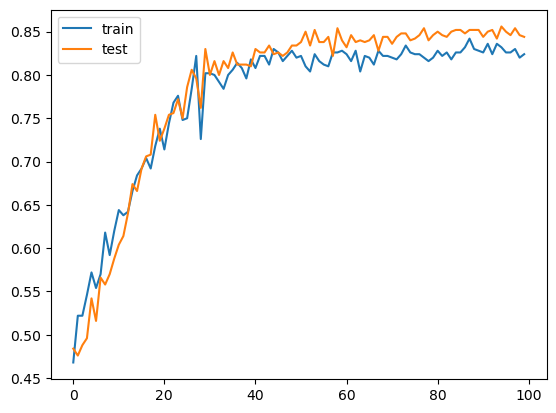

In [8]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()


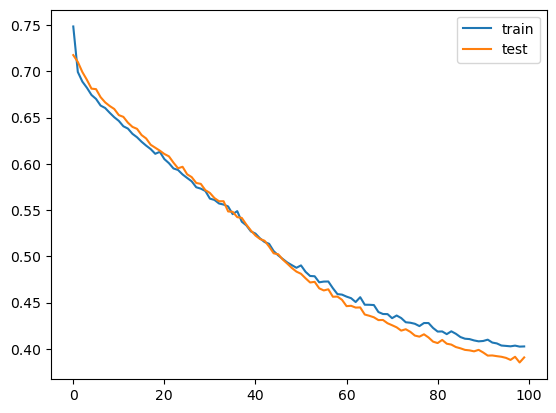

In [9]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

In [10]:
!pip install pandoc

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
     ------------------- -------------------- 61.4/127.0 kB ? eta -:--:--
     ------------------- -------------------- 61.4/127.0 kB ? eta -:--:--
     ------------------- -------------------- 61.4/127.0 kB ? eta -:--:--
     ------------------- -------------------- 61.4/127.0 kB ? eta -:--:--
     ------------------- -------------------- 61.4/127.0 kB ? eta -:--:--
     ------------------- -------------------- 61.4/127.0 kB ? eta -:--:--
     ----------------------- ------------- 81.9/127.0 kB 241.3 kB/s eta 0:00:01
     ------------------------------------ 127.0/127.0 kB 373.2 kB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33290 sha256=2ae643d4e8db288b5c6a18dec5fdc2b360af0b18ad5be24524500d0c3c3dde1b
  Stored in di

# 3.3 MLP for the two circles problem

In [11]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization

# Generate 2d dataset

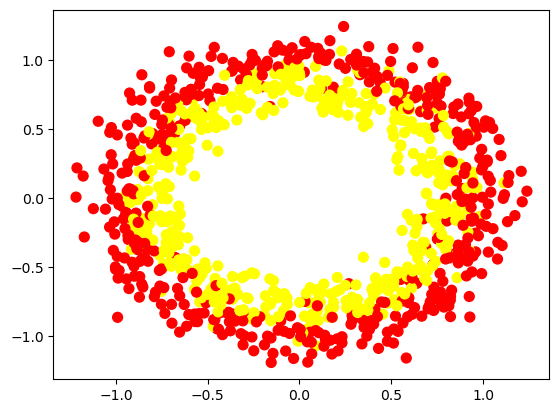

In [12]:
x,y=make_circles(n_samples=1000,noise=0.1,random_state=1)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

# Split the data for train & test

In [13]:
n_train=500
trainX,testX=x[:n_train,:],x[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

# Define the Model

In [14]:
model=Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
#optimizer
optm=SGD(learning_rate=0.01,momentum=0.9)
#compiler
model.compile(loss='binary_crossentropy',optimizer=optm,metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                150       
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 100 (400.00 Byte)
_________________________________________________________________


In [16]:
#Run the NN
history=model.fit(trainX,trainy,validation_data=(testX,testy),epochs=100,verbose=1)

Epoch 1/100
16/16 [==============================] - 2s 34ms/step - loss: 0.9018 - accuracy: 0.5300 - val_loss: 0.6972 - val_accuracy: 0.5120
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6356 - accuracy: 0.6200 - val_loss: 0.8072 - val_accuracy: 0.4960
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5532 - accuracy: 0.7420 - val_loss: 0.8418 - val_accuracy: 0.4960
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5005 - accuracy: 0.7860 - val_loss: 0.8406 - val_accuracy: 0.4960
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4826 - accuracy: 0.7800 - val_loss: 0.8396 - val_accuracy: 0.4980
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.7980 - val_loss: 0.7859 - val_accuracy: 0.5120
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4517 - accuracy: 0.8040 - val_loss: 0.7359 - val_accuracy: 0.5400
Epoch 8/10

16/16 [==============================] - 0s 12ms/step - loss: 0.4151 - accuracy: 0.8060 - val_loss: 0.3633 - val_accuracy: 0.8460
Epoch 59/100
16/16 [==============================] - 0s 11ms/step - loss: 0.4355 - accuracy: 0.7840 - val_loss: 0.3610 - val_accuracy: 0.8420
Epoch 60/100
16/16 [==============================] - 0s 11ms/step - loss: 0.4457 - accuracy: 0.8120 - val_loss: 0.3604 - val_accuracy: 0.8500
Epoch 61/100
16/16 [==============================] - 0s 11ms/step - loss: 0.4162 - accuracy: 0.7920 - val_loss: 0.3574 - val_accuracy: 0.8520
Epoch 62/100
16/16 [==============================] - 0s 11ms/step - loss: 0.4094 - accuracy: 0.8140 - val_loss: 0.3607 - val_accuracy: 0.8420
Epoch 63/100
16/16 [==============================] - 0s 12ms/step - loss: 0.4450 - accuracy: 0.7880 - val_loss: 0.3580 - val_accuracy: 0.8580
Epoch 64/100
16/16 [==============================] - 0s 10ms/step - loss: 0.4404 - accuracy: 0.7820 - val_loss: 0.3700 - val_accuracy: 0.8240
Epoch 65/100

# Evaluate the model

In [17]:
_,train_acc=model.evaluate(trainX,trainy,verbose=1)
_,test_acc=model.evaluate(testX,testy,verbose=1)
print('Train Accuracy:\t',train_acc)
print()
print('Test Accuracy:\t',test_acc)

16/16 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8520
Train Accuracy:	 0.8320000171661377

Test Accuracy:	 0.8519999980926514


# Plot the results

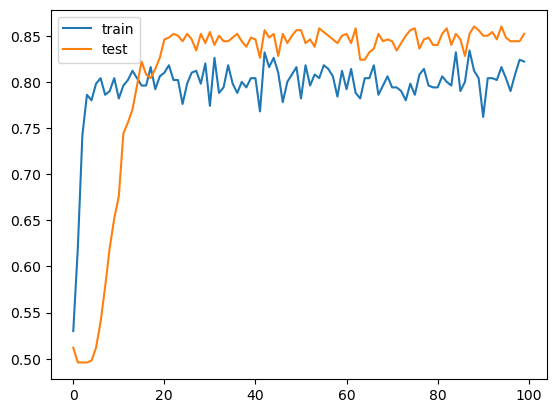

In [18]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

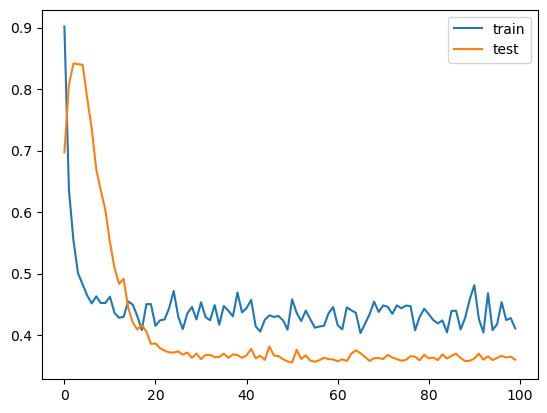

In [19]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

# 3.4 Keras tuner install

In [20]:
!pip install keras_tuner -q

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
def build_model(hp):
 units=hp.Int(name='units',min_value=16,max_value=64,step=16)
 model=keras.Sequential([
 layers.Dense(units,activation='relu'),
 layers.Dense(10,activation='softmax')
 ])
 optimizer=hp.Choice(name='optimizer',values=['adagrad','adam'])
 model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 return model


# Keras Tuner - HyperModel

In [26]:
import keras_tuner as kt

class SimpleMLP(kt.HyperModel):
    def __init__(self, num_classes):
        self.num_classes = num_classes

    def build(self, hp):
        units = hp.Int(name='units', min_value=16, max_value=64, step=16)
        model = keras.Sequential([
            layers.Dense(units, activation='relu'),
            layers.Dense(self.num_classes, activation='softmax')
        ])
        optimizer = hp.Choice(name='optimizer', values=['adagrad', 'adam'])
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

hypermodel = SimpleMLP(num_classes=10)


In [30]:
tuner=kt.BayesianOptimization(build_model,
 objective='val_accuracy',max_trials=5,)

In [31]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adagrad', 'conditions': [], 'values': ['adagrad', 'adam'], 'ordered': False}


# Model

In [29]:
#load mnist dataset from keras
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()
xtrain=xtrain.reshape((-1,28*28)).astype('float32')/255
xtest=xtest.reshape((-1,28*28)).astype('float32')/255
xtrain_full=xtrain[:]
ytrain_full=ytrain[:]
num_val_samples=10000
xtrain,xval=xtrain[:-num_val_samples],xtrain[-num_val_samples:]
ytrain,yval=ytrain[:-num_val_samples],ytrain[-num_val_samples:]
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',patience=3),]
tuner.search(xtrain,ytrain,batch_size=128,epochs=20,validation_data=(xval,yval),
 callbacks=callbacks,verbose=2)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
16                |16                |units
adagrad           |adagrad           |optimizer

Epoch 1/20
391/391 - 3s - loss: 2.2220 - accuracy: 0.1564 - val_loss: 2.0925 - val_accuracy: 0.2616 - 3s/epoch - 7ms/step
Epoch 2/20
391/391 - 1s - loss: 1.9823 - accuracy: 0.3609 - val_loss: 1.8602 - val_accuracy: 0.4747 - 1s/epoch - 4ms/step
Epoch 3/20
391/391 - 2s - loss: 1.7693 - accuracy: 0.5383 - val_loss: 1.6444 - val_accuracy: 0.6193 - 2s/epoch - 4ms/step
Epoch 4/20
391/391 - 1s - loss: 1.5690 - accuracy: 0.6465 - val_loss: 1.4477 - val_accuracy: 0.7039 - 1s/epoch - 3ms/step
Epoch 5/20
391/391 - 1s - loss: 1.3962 - accuracy: 0.7033 - val_loss: 1.2876 - val_accuracy: 0.7505 - 1s/epoch - 3ms/step
Epoch 6/20
391/391 - 1s - loss: 1.2586 - accuracy: 0.7376 - val_loss: 1.1612 - val_accuracy: 0.7768 - 1s/epoch - 4ms/step
Epoch 7/20
391/391 - 2s - loss: 1.1487 - accuracy: 0.7597 - val_loss: 1.0606 - val_accuracy: 0.

KeyboardInterrupt: 

# Build a deep learning model to classify the mnist digits dataset with Batch Normalization.

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a vector
    Dense(128, activation='relu'),
    BatchNormalization(),  # Add Batch Normalization after the dense layer
    Dense(64, activation='relu'),
    BatchNormalization(),  # Batch Normalization after the second dense layer
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2524 - accuracy: 0.9246 - val_loss: 0.1333 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1258 - accuracy: 0.9614 - val_loss: 0.1137 - val_accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0993 - accuracy: 0.9688 - val_loss: 0.1012 - val_accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0785 - accuracy: 0.9750 - val_loss: 0.0927 - val_accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0692 - accuracy: 0.9783 - val_loss: 0.0809 - val_accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0596 - accuracy: 0.9808 - val_loss: 0.0763 - val_accuracy: 0.9766
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0537 - accuracy: 0.9823 - val_loss: 0.0743 - val_accuracy:

# Build a Feed Forward Neural Network for any problems with keras tuner.

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into a vector

    # Tune the number of hidden layers and units in each layer
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                        activation='relu'))

    model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the tuner for hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='keras_tuner_dir',  # Directory to save the search output
    project_name='mnist_ffnn'  # Name for the search project
)

# Perform the hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
best_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Trial 5 Complete [00h 00m 25s]
val_accuracy: 0.9664000272750854

Best val_accuracy So Far: 0.9789999723434448
Total elapsed time: 00h 03m 00s
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2269 - accuracy: 0.9317 - val_loss: 0.1347 - val_accuracy: 0.9601
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0981 - accuracy: 0.9698 - val_loss: 0.0889 - val_accuracy: 0.9731
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0695 - accuracy: 0.9785 - val_loss: 0.1023 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0888 - val_accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0956 - val_accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0774 - val_accuracy: 0